In [34]:
import cv2
import numpy as np
import os
import time
import scipy.io as sio
import matplotlib.pyplot as plt
import math
# import main_functions as main

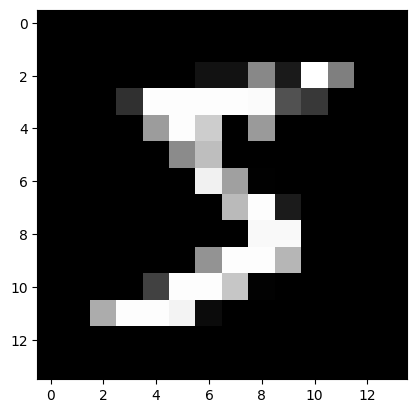

In [35]:
## Add for Visualization.
mnist_train = sio.loadmat('./mnist_train.mat')
mnist_test = sio.loadmat('./mnist_test.mat')
im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
im_test, label_test = mnist_test['im_test'], mnist_test['label_test']

plt.imshow(mnist_train['im_train'][:, 0].reshape((14, 14), order='F'), cmap='gray')

In [142]:
def get_mini_batch(im_train, label_train, batch_size):
    # TO DO

    ## One hot encode the labels.
    label_train_encoded = np.eye(10)[label_train[0]].T

    ## Get shuffled indices.
    random_indices = np.random.permutation(label_train.shape[1])

    print("Mini Batch outputs a list, check this afterwards.")
    ## Assume mini batch to be a list of items.
    ## Get the Mini Batches, numpy automatically takes care of the last batch
    mini_batch_x = [im_train[:,random_indices[i*batch_size:(i+1)*batch_size]] for i in range(math.ceil(im_train.shape[1]//batch_size))]
    mini_batch_y = [label_train_encoded[:,random_indices[i*batch_size:(i+1)*batch_size]] for i in range(math.ceil(label_train_encoded.shape[1]//batch_size))]

    return mini_batch_x, mini_batch_y

In [143]:
def fc(x, w, b):
    # TO DO
    y = w@x + b
    return y

In [133]:
def fc_backward(dl_dy, x, w, b, y):
    # TO DO
    ## dl_dw is a row vector. Convert to Column
    dl_dy = dl_dy.T
    # print("Shape of dl_dy : ", dl_dy.shape)
    # print("Shape of x : ", x.shape)
    # print("Shape of w : ", w.shape)
    # print("Shape of b : ", b.shape)
    # print("Shape of y : ", y.shape)
    dl_dw = (dl_dy) @ x.T
    dl_db = dl_dy
    dl_dx = (dl_dy.T @ w).T
    # dl_dx = (dl_dy.T * np.sum(w,axis=1)).T

    # print("Shape of dl_dw : ", dl_dw.shape)
    # print("Shape of dl_db : ", dl_db.shape)
    # print("Shpae of dl_dx : ", dl_dx.shape)
    return dl_dx, dl_dw, dl_db

In [141]:
def loss_euclidean(y_tilde, y):
    # TO DO
    l = np.sum(np.square(y_tilde - y))
    dl_dy = y_tilde - y
    return l, dl_dy

In [40]:
def loss_cross_entropy_softmax(x, y):
    # TO DO
    return l, dl_dy

In [41]:
def relu(x):
    # TO DO
    return y

In [42]:
def relu_backward(dl_dy, x, y):
    # TO DO
    return dl_dx

In [43]:
def conv(x, w_conv, b_conv):
    # TO DO
    return y

In [44]:
def conv_backward(dl_dy, x, w_conv, b_conv, y):
    # TO DO
    return dl_dw, dl_db

In [45]:
def pool2x2(x):
    # TO DO
    return y

In [46]:
def pool2x2_backward(dl_dy, x, y):
    # TO DO
    return dl_dx

In [47]:
def flattening(x):
    # TO DO
    return y

In [48]:
def flattening_backward(dl_dy, x, y):
    # TO DO
    return dl_dx

In [144]:
def train_slp_linear(mini_batch_x, mini_batch_y):
    # TO DO
    learning_rate = 0.01
    decay_rate = 0.5
    ## Shape of mini_batch_x is 196* batch_size
    ## Shape of mini_batch_y is 10 * batch_size

    ## Initialize Weights.
    input_size = mini_batch_x[0].shape[0]
    output_size = mini_batch_y[0].shape[0]
    w = np.random.randn(output_size,input_size)
    b = np.random.randn(output_size,1)

    k = 0
    losses = []
    for iter in range(10000):
        if iter%1000 == 0:
            print("Iteration Number is : ", iter)
            learning_rate = learning_rate*decay_rate
        dl_dw_cumlative = np.zeros_like(w)
        dl_db_cumlative = np.zeros_like(b)
        loss_cum = 0
        for x, y in zip(mini_batch_x[k].T, mini_batch_y[k].T):
            x = x.reshape(-1,1)
            y = y.reshape(-1,1)
            y_tilde = fc(x, w, b)    
            # print("Y tilde : ", y_tilde)
            # print("y is : ", y)
            loss, dl_dy = loss_euclidean(y_tilde, y)   ## dl_dy is columns
            dl_dx, dl_dw, dl_db = fc_backward(dl_dy.T, x, w, b, y)

            ## Add to loss.
            dl_dw_cumlative += dl_dw
            dl_db_cumlative += dl_db
            loss_cum += loss
        #     break
        # break
        print("Loss is : ", loss_cum)
        losses.append(loss_cum)
        k += 1
        if k == len(mini_batch_x):
            k = 0
        ## Update weights
        w -= (learning_rate*dl_dw_cumlative)/len(mini_batch_x)
        b -= (learning_rate*dl_db_cumlative)/len(mini_batch_x)
    plt.plot(np.arange(len(losses)), losses)
    plt.show()
    return w, b

Mini Batch outputs a list, check this afterwards.
Iteration Number is :  0
Loss is :  9737.87466093579
Loss is :  9600.10138108332
Loss is :  7756.615094720996
Loss is :  7888.100444726388
Loss is :  9301.927305044319
Loss is :  9444.43519324072
Loss is :  8925.240638665884
Loss is :  9254.713182819994
Loss is :  7580.881497582014
Loss is :  9294.133644134996
Loss is :  7710.861633604101
Loss is :  7513.272883401394
Loss is :  8051.5955671605625
Loss is :  8185.75926294
Loss is :  10180.842765452795
Loss is :  7849.278384007523
Loss is :  8238.304486376626
Loss is :  8041.6466890746715
Loss is :  9151.668824857325
Loss is :  7521.269553474986
Loss is :  7696.611471737315
Loss is :  7027.727078570385
Loss is :  8889.315733465104
Loss is :  8820.271747709878
Loss is :  7880.783539683275
Loss is :  9217.925545304777
Loss is :  8006.564892355201
Loss is :  8686.375703907981
Loss is :  7141.868405717869
Loss is :  9498.110715427329
Loss is :  7987.0050031296505
Loss is :  8647.733152574716


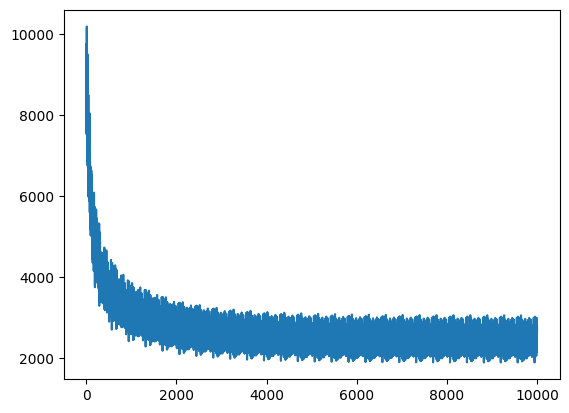

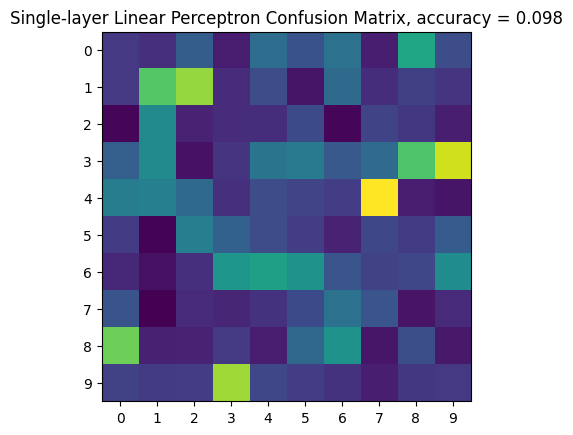

Mini Batch outputs a list, check this afterwards.


NameError: name 'w' is not defined

In [145]:
if __name__ == '__main__':
    main_slp_linear()
    main_slp()
    main_mlp()
    main_cnn()

In [50]:
def train_slp(mini_batch_x, mini_batch_y):
    # TO DO
    return w, b

In [51]:
def train_mlp(mini_batch_x, mini_batch_y):
    # TO DO
    return w1, b1, w2, b2

In [52]:
def train_cnn(mini_batch_x, mini_batch_y):
    # TO DO
    return w_conv, b_conv, w_fc, b_fc

In [53]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
# from cnn import get_mini_batch, fc, relu, conv, pool2x2, flattening
# from cnn import train_slp_linear, train_slp, train_mlp, train_cnn


def main_slp_linear():
    mnist_train = sio.loadmat('./mnist_train.mat')
    mnist_test = sio.loadmat('./mnist_test.mat')
    im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
    im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
    batch_size = 32
    im_train, im_test = im_train / 255.0, im_test / 255.0
    mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
    w, b = train_slp_linear(mini_batch_x, mini_batch_y)
    sio.savemat('slp_linear.mat', mdict={'w': w, 'b': b})

    acc = 0
    confusion = np.zeros((10, 10))
    num_test = im_test.shape[1]
    for i in range(num_test):
        x = im_test[:, [i]]
        y = fc(x, w, b)
        l_pred = np.argmax(y)
        confusion[l_pred, label_test[0, i]] = confusion[l_pred, label_test[0, i]] + 1

        if l_pred == label_test[0, i]:
            acc = acc + 1
    accuracy = acc / num_test
    for i in range(10):
        confusion[:, i] = confusion[:, i] / np.sum(confusion[:, i])

    label_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    visualize_confusion_matrix(confusion, accuracy, label_classes, 'Single-layer Linear Perceptron Confusion Matrix')

def main_slp():
    mnist_train = sio.loadmat('./mnist_train.mat')
    mnist_test = sio.loadmat('./mnist_test.mat')
    im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
    im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
    batch_size = 32
    im_train, im_test = im_train / 255.0, im_test / 255.0
    mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
    w, b = train_slp(mini_batch_x, mini_batch_y)
    sio.savemat('slp.mat', mdict={'w': w, 'b': b})

    acc = 0
    confusion = np.zeros((10, 10))
    num_test = im_test.shape[1]
    for i in range(num_test):
        x = im_test[:, [i]]
        y = fc(x, w, b)
        l_pred = np.argmax(y)
        confusion[l_pred, label_test[0, i]] = confusion[l_pred, label_test[0, i]] + 1

        if l_pred == label_test[0, i]:
            acc = acc + 1
    accuracy = acc / num_test
    for i in range(10):
        confusion[:, i] = confusion[:, i] / np.sum(confusion[:, i])

    label_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    visualize_confusion_matrix(confusion, accuracy, label_classes, 'Single-layer Perceptron Confusion Matrix')

def main_mlp():
    mnist_train = sio.loadmat('./mnist_train.mat')
    mnist_test = sio.loadmat('./mnist_test.mat')
    im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
    im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
    batch_size = 32
    im_train, im_test = im_train / 255.0, im_test / 255.0
    mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
    w1, b1, w2, b2 = train_mlp(mini_batch_x, mini_batch_y)
    sio.savemat('mlp.mat', mdict={'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2})

    acc = 0
    confusion = np.zeros((10, 10))
    num_test = im_test.shape[1]
    for i in range(num_test):
        x = im_test[:, [i]]
        pred1 = fc(x, w1, b1)
        pred2 = relu(pred1)
        y = fc(pred2, w2, b2)
        l_pred = np.argmax(y)
        confusion[l_pred, label_test[0, i]] = confusion[l_pred, label_test[0, i]] + 1

        if l_pred == label_test[0, i]:
            acc = acc + 1
    accuracy = acc / num_test
    for i in range(10):
        confusion[:, i] = confusion[:, i] / np.sum(confusion[:, i])

    label_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    visualize_confusion_matrix(confusion, accuracy, label_classes, 'Multi-layer Perceptron Confusion Matrix')

def main_cnn():
    mnist_train = sio.loadmat('./mnist_train.mat')
    mnist_test = sio.loadmat('./mnist_test.mat')
    im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
    im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
    batch_size = 32
    im_train, im_test = im_train / 255.0, im_test / 255.0
    mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
    w_conv, b_conv, w_fc, b_fc = train_cnn(mini_batch_x, mini_batch_y)
    sio.savemat('cnn.mat', mdict={'w_conv': w_conv, 'b_conv': b_conv, 'w_fc': w_fc, 'b_fc': b_fc})
    # could use following two lines to replace above two lines if only want to check results
    # data = sio.loadmat('cnn.mat')
    # w_conv, b_conv, w_fc, b_fc = data['w_conv'], data['b_conv'], data['w_fc'], data['b_fc']
    
    acc = 0
    confusion = np.zeros((10, 10))
    num_test = im_test.shape[1]
    for i in range(num_test):
        x = im_test[:, [i]].reshape((14, 14, 1), order='F')
        pred1 = conv(x, w_conv, b_conv)  # (14, 14, 3)
        pred2 = relu(pred1)  # (14, 14, 3)
        pred3 = pool2x2(pred2)  # (7, 7, 3)
        pred4 = flattening(pred3)  # (147, 1)
        y = fc(pred4, w_fc, b_fc)  # (10, 1)
        l_pred = np.argmax(y)
        confusion[l_pred, label_test[0, i]] = confusion[l_pred, label_test[0, i]] + 1
        if l_pred == label_test[0, i]:
            acc = acc + 1
    accuracy = acc / num_test
    for i in range(10):
        confusion[:, i] = confusion[:, i] / np.sum(confusion[:, i])

    label_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    visualize_confusion_matrix(confusion, accuracy, label_classes, 'CNN Confusion Matrix')

def visualize_confusion_matrix(confusion, accuracy, label_classes, name):
    plt.title("{}, accuracy = {:.3f}".format(name, accuracy))
    plt.imshow(confusion)
    ax, fig = plt.gca(), plt.gcf()
    plt.xticks(np.arange(len(label_classes)), label_classes)
    plt.yticks(np.arange(len(label_classes)), label_classes)
    ax.set_xticks(np.arange(len(label_classes) + 1) - .5, minor=True)
    ax.set_yticks(np.arange(len(label_classes) + 1) - .5, minor=True)
    ax.tick_params(which="minor", bottom=False, left=False)
    plt.show()


In [54]:
# if __name__ == '__main__':
#     main.main_slp_linear()
#     main.main_slp()
#     main.main_mlp()
#     main.main_cnn()